# College application status

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [47]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [48]:
df.fillna(0.00,inplace=True)

In [49]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


<AxesSubplot:xlabel='status', ylabel='count'>

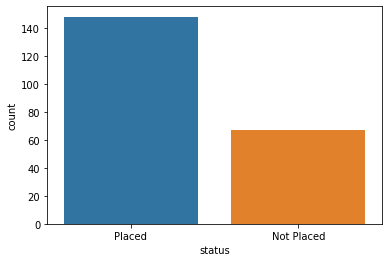

In [50]:
sns.countplot(x=df['status'])

In [51]:
df2=df[df.status=='Placed']
df3=df[df.status=='Not Placed']

In [52]:
def change(data):
    if data<50.00:
        return 1
    elif data>=50.00 and data<60.00:
        return 2
    elif data>=60.00 and data<70.00:
        return 3
    elif data>=70.00 and data<80.00:
        return 4
    else:
        return 5
    
df['10_percent']=df.ssc_p.apply(change)
df['12_percent']=df.hsc_p.apply(change)
df['degree_percent']=df.degree_p.apply(change)
df['etest_percent']=df.etest_p.apply(change)
df['mba_percent']=df.mba_p.apply(change)

In [53]:
df.drop(['ssc_p','hsc_p','hsc_p','degree_p','etest_p','mba_p'],axis=1,inplace=True)

## Classifying data

In [54]:
#For applying models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [55]:
#converting categorical variables
from sklearn.preprocessing import LabelEncoder

# this will transform multi-class worded variables into numerical groups (0, 1, 2, etc.)
s=df.dtypes=='object'
object_cols=list(s[s].index)
print(object_cols)

encoder=LabelEncoder()
for cols in object_cols:
    df[cols]=encoder.fit_transform(df[cols]) 

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [56]:
# will make the 1st colum become the index of the data frame
df.set_index('sl_no',inplace=True)
df.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,salary,10_percent,12_percent,degree_percent,etest_percent,mba_percent
sl_no,,,,,,,,,,,,,,
1,1,1,1,1,2,0,1,1,270000.0,3,5,2,2,2
2,1,0,1,2,2,1,0,1,200000.0,4,4,4,5,3
3,1,0,0,0,0,0,0,1,250000.0,3,3,3,4,2
4,1,0,0,2,2,0,1,0,0.0,2,2,2,3,2
5,1,0,0,1,0,0,0,1,425000.0,5,4,4,5,2


In [57]:
y_classification=df['status']
y_classification.head()

sl_no
1    1
2    1
3    1
4    0
5    1
Name: status, dtype: int64

In [58]:
x = df
x.drop(['status'], axis = 1, inplace = True)

In [59]:
x.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,salary,10_percent,12_percent,degree_percent,etest_percent,mba_percent
sl_no,,,,,,,,,,,,,
1,1,1,1,1,2,0,1,270000.0,3,5,2,2,2
2,1,0,1,2,2,1,0,200000.0,4,4,4,5,3
3,1,0,0,0,0,0,0,250000.0,3,3,3,4,2
4,1,0,0,2,2,0,1,0.0,2,2,2,3,2
5,1,0,0,1,0,0,0,425000.0,5,4,4,5,2


In [60]:
y_classification.head()

sl_no
1    1
2    1
3    1
4    0
5    1
Name: status, dtype: int64